# Contenido

* [Objetivos](#objetivos)
* [Diccionario de Datos](#diccionario)
* [Introduccion](#introduccion)
* [Dataframe 1](#dataframe_1)
    * [1.1 Observacion](#observacion)
* [Dataframe 2](#dataframe_2)
    * [2.1 Observacion](#observacion_2)
* [3 Dataframe 3](#dataframe_3)
    * [3.1 Observacion](#observacion_3)
* [5 Analisis de los Datos](#analisis_de_los_datos)
    * [5.1 Visitas](#visitas)
        * [5.1.1 ¿Cuántas personas lo usan cada día, semana y mes?](#cplu)
            * [5.1.1.1 Observacion](#observacion_4)
        * [5.1.2 ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)](#cshd)
            * [5.1.2.1 Observacion](#observacion_5)
        * [5.1.3 ¿Cuál es la duración de cada sesión?](#cdcs)
            * [5.1.3.1 Observacion](#observacion_6)    
        * [5.1.4 ¿Con qué frecuencia los usuarios y las usuarias regresan? ](#cfur)
            * [5.1.4.1 Observacion](#observacion_7)
    * [5.2 Ventas](#ventas)
        * [5.2.1 ¿Cuándo la gente empieza a comprar?](#cgec)
            * [5.2.1.1 Observacion](#observacion_8)
        * [5.2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?](#cphdptd)
            * [5.2.2.1 Observacion](#observacion_9)
        * [5.2.3 ¿Cuál es el tamaño promedio de compra?](#ctpc)
            * [5.2.3.1 Observacion](#observacion_10)
        * [5.2.4 ¿Cuánto dinero traen? (LTV)](#cdt)
            * [5.2.4.1 Observacion](#observacion_11)
    * [5.3 Marketing](#marketing)
        * [5.3.1 ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)](#cdg)
            * [5.3.1.1 Observacion](#observacion_12)
        * [5.3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?](#cfcaccuf)
            * [5.3.2.1 Observacion](#observacion_13)
        * [5.3.3 ¿Cuán rentables eran las inversiones? (ROMI)](#crei)
            * [5.3.3.1 Observacion](#observacion_14)
* [Conclusion General](#cg)
* [Recomendaciones](#recomendaciones)

# Objetivos <a id='objetivos'></a>

* cómo los clientes usan el servicio;



* cuándo empiezan a comprar;



* cuánto dinero aporta cada cliente a la compañía;



* cuándo los ingresos cubren el costo de adquisición de los clientes.

# Diccionario de Datos <a id='diccionario'></a>

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

    * Uid: identificador único del usuario;
    * Device: dispositivo del usuario;
    * Start Ts: fecha y hora de inicio de la sesión;
    * End Ts: fecha y hora de término de la sesión;
    * Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
    * Todas las fechas de esta tabla están en formato AAAA-MM-DD.




La tabla orders (datos sobre pedidos):

    * Uid: identificador único del usuario que realiza un pedido;
    * Buy Ts: fecha y hora del pedido;
    * Revenue: ingresos de Y.Afisha de este pedido.



La tabla costs (datos sobre gastos de marketing):

    * source_id: identificador de la fuente de anuncios
    * dt: fecha;
    * costs: gastos en esta fuente de anuncios en este día.

# Introduccion <a id='introduccion'></a>

Y.Afisha, una plataforma de venta de boletos para eventos, ha experimentado un crecimiento significativo en su base de usuarios y ventas. El análisis de datos realizado abarca aspectos cruciales como patrones de visitas, comportamiento de compra, valor del tiempo de vida del cliente (LTV) y retorno de la inversión en marketing (ROMI). Este estudio proporciona insights valiosos para optimizar las operaciones y estrategias de marketing de la empresa.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df1= pd.read_csv('/datasets/visits_log_us.csv')
df2= pd.read_csv('/datasets/orders_log_us.csv')
df3= pd.read_csv('/datasets/costs_us.csv')

# Dataframe 1 <a id='dataframe_1'></a>

In [3]:
# Modificamos las columnas a sus formatos correctos

df1['End Ts']= pd.to_datetime(df1['End Ts'])
df1['Start Ts']= pd.to_datetime(df1['Start Ts'])
df1['Device']= df1['Device'].astype('category')
df1['Uid']= df1['Uid'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(2)
memory usage: 11.3 MB


In [4]:
# modificamos los nombres de las columnas para que esten correctamente y visualizamos los datos para verificar los datos.

new_columns1 ={
    'Device': 'device',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Start Ts': 'start_ts',
    'Uid': 'uid'
}
df1.rename(columns = new_columns1, inplace = True)
print(df1.columns)
print()
print(df1.head())

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                   uid  
0 -1567487796173571554  
1   104060357244891740  
2  7459035603376831527  
3 -2272063814375341402  
4 -8477049253672870448  


In [5]:
#Verificamos cuantos datos con el signo negativo tenemos en esta columna

filtered1= df1['uid'].astype(str)
filtered1[filtered1.str.startswith('-')]

0         -1567487796173571554
3         -2272063814375341402
4         -8477049253672870448
5         -2439207879601176229
7         -7022878382855011304
                  ...         
359395      -83452591748064077
359396      -75912520690432030
359397      -59446488208803322
359398      -58127129084775131
359399      -50615139655002057
Name: uid, Length: 179803, dtype: object

In [6]:
#Utilizamos el metodo abs para eliminar el signo '-'

df1['uid']= df1['uid'].abs()
df1.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1567487796173571554
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2272063814375341402
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,8477049253672870448


# Observacion: <a id='observacion'></a>

En este dataset pudimos observar datos con el signo de '-' en la columna 'uid' exactamente 179803 datos, por lo que se procedio a eliminar este signo de los codigos de identificacion unica de cada usuario, tambien modificamos los nombres de las columnas para que tuvieran el formato correcto.

# Dataframe 2 <a id='dataframe_2'></a>

In [7]:
# Modificamos las columnas a sus formatos correctos

df2['Buy Ts']= pd.to_datetime(df2['Buy Ts'])
df2['Uid']= df2['Uid'].astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [8]:
# modificamos los nombres de las columnas para que esten correctamente y visualizamos los datos para verificar los datos.

new_columns2 ={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid',
}
df2.rename(columns = new_columns2, inplace = True)
print(df2.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [9]:
#Visualizamos nuestros datos en busqueda de datos atipicos.

df2.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,-8117441949118824122
1,2017-06-01 00:25:00,0.55,-6819486350016644169
2,2017-06-01 00:27:00,0.37,-543063512405337772
3,2017-06-01 00:29:00,0.55,-2337504304266998611
4,2017-06-01 07:58:00,0.37,-4246138198461172166


In [10]:
#Verificamos cuantos datos con el signo negativo tenemos en esta columna

filtered2= df2['uid'].astype(str)
filtered2[filtered2.str.startswith('-')]

0        -8117441949118824122
1        -6819486350016644169
2         -543063512405337772
3        -2337504304266998611
4        -4246138198461172166
                 ...         
50406    -5325290768098931952
50407    -2870399464313825909
50408    -2592351495200723586
50410    -6150117474222222992
50411    -7077103708202075640
Name: uid, Length: 24905, dtype: object

In [11]:
#Utilizamos el metodo abs para eliminar el signo '-'

df2['uid']= df2['uid'].abs()
df2.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,8117441949118824122
1,2017-06-01 00:25:00,0.55,6819486350016644169
2,2017-06-01 00:27:00,0.37,543063512405337772
3,2017-06-01 00:29:00,0.55,2337504304266998611
4,2017-06-01 07:58:00,0.37,4246138198461172166


In [12]:
#Verificamos si tenemos valores 0 y contamos cual es la cantidad de estos valores en nuestros datos.

filtered_0= df2[df2['revenue']== 0]
print(filtered_0.head(10))
print()
print()
print('Cantidad de ceros: ', len(filtered_0))

                  buy_ts  revenue                  uid
1802 2017-06-22 18:19:00      0.0  1416215280783008533
2787 2017-07-07 15:54:00      0.0  8165319053293938683
4783 2017-08-02 14:54:00      0.0   184148767273119549
5095 2017-08-09 14:48:00      0.0  5603453646174104178
5863 2017-08-23 13:43:00      0.0  5603453646174104178
6393 2017-08-30 16:30:00      0.0  5603453646174104178
6995 2017-09-06 13:57:00      0.0  5603453646174104178
7104 2017-09-07 14:37:00      0.0  5603453646174104178
7488 2017-09-11 16:53:00      0.0  8276858283244483808
8160 2017-09-18 16:49:00      0.0  2883839899480223178


Cantidad de ceros:  51


In [13]:
#Descartamos estos datos con valores 0

df2= df2[df2['revenue'] != 0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50364 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50364 non-null  datetime64[ns]
 1   revenue  50364 non-null  float64       
 2   uid      50364 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


# Observacion: <a id='observacion_2'></a>

en este dataset tambien encontramos datos con el signo '-' en la columna 'uid' se procedio a realizar la modificacion requerida, realizamos las modificaciones de los nombres de las columnas para tenerlos de manera correcta, tambien encontramos datos en la columna 'revenue' con valores '0', 51 valores en los datos, eliminamos estos datos de nuestro Dataframe.

# Dataframe 3 <a id='dataframe_3'></a>

In [14]:
df3['dt']= pd.to_datetime(df3['dt'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
df3.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


# Observacion: <a id='observacion_3'></a>

en este dataset, simplemente colocamos el formato correcto a la columna dt, pero no encontramos algun otro dato atipico que corregir. utilizamos el metodo describe() para tener una vision un poco mas clara de los datos. la columna source_id simplemente muestra las funtes de donde provienen los clientes. podemos evidenciar que la media se encuenta entre las fuentes 4 y 5 debemos mas adelante indagar mas sobre esto. 

En la columna costs tenemos por asi decirlo las inversiones que se realizan para atraer cliente mediante estas fuentes, los costos promedio son alrededor de 129 y su costo maximo esta en aproximadamente 1788.

# Analisis de los Datos <a id='Analisis_de_los_datos'></a>

# Visitas <a id='visitas'></a>

In [16]:
# se crean las nuevas columnas con datos por dia, semana, mes y año. 

df1['session_year']  = df1['start_ts'].dt.year
df1['session_month'] = df1['start_ts'].dt.month
df1['session_week']  = df1['start_ts'].dt.week
df1['session_date'] = df1['start_ts'].dt.date

df1.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1567487796173571554,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2272063814375341402,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,8477049253672870448,2017,12,52,2017-12-27


# ¿Cuántas personas lo usan cada día, semana y mes? <a id='cplu'></a>

In [17]:
# Se realizan los calculos con las formulas y los metodos necesarios para saber la cantidad de personas que usan la aplicacion.

dau_total = df1.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df1.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = (df1.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())

print('Número de usuarios activos diarios (únicos): ', dau_total)
print()
print()
print('Número de usuarios activos semanales: ', wau_total)
print()
print()
print('Número de usuarios activos mensuales: ', mau_total)

Número de usuarios activos diarios (únicos):  uid    907.991758
dtype: float64


Número de usuarios activos semanales:  uid    5716.245283
dtype: float64


Número de usuarios activos mensuales:  uid    23228.416667
dtype: float64


# Observacion: <a id='observacion_4'></a>

con los datos analizados podemos saber que en promedio una 908 personas lo usan diario, 5716 lo usan semanal y 23228 lo usan mensualmente.

# ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión). <a id='cshd'></a>

In [18]:
# Agrupamos los datos con las columnas year y date para encontar el numero de usuarios unicos

sessions_per_user = df1.groupby(['session_year', 'session_date']).agg(
    {'uid': ['count', 'nunique']}
)

# cambiamos los nombres de las columnas 

sessions_per_user.columns = ['n_sessions', 'n_users']

# Encontramos la cantidad de sesiones por usuario diario

sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user= sessions_per_user.reset_index()
print(sessions_per_user)

     session_year session_date  n_sessions  n_users  sessions_per_user
0            2017   2017-06-01         664      605           1.097521
1            2017   2017-06-02         658      608           1.082237
2            2017   2017-06-03         477      445           1.071910
3            2017   2017-06-04         510      476           1.071429
4            2017   2017-06-05         893      820           1.089024
..            ...          ...         ...      ...                ...
359          2018   2018-05-27         672      620           1.083871
360          2018   2018-05-28        1156     1039           1.112608
361          2018   2018-05-29        1035      948           1.091772
362          2018   2018-05-30        1410     1289           1.093871
363          2018   2018-05-31        2256     1997           1.129695

[364 rows x 5 columns]


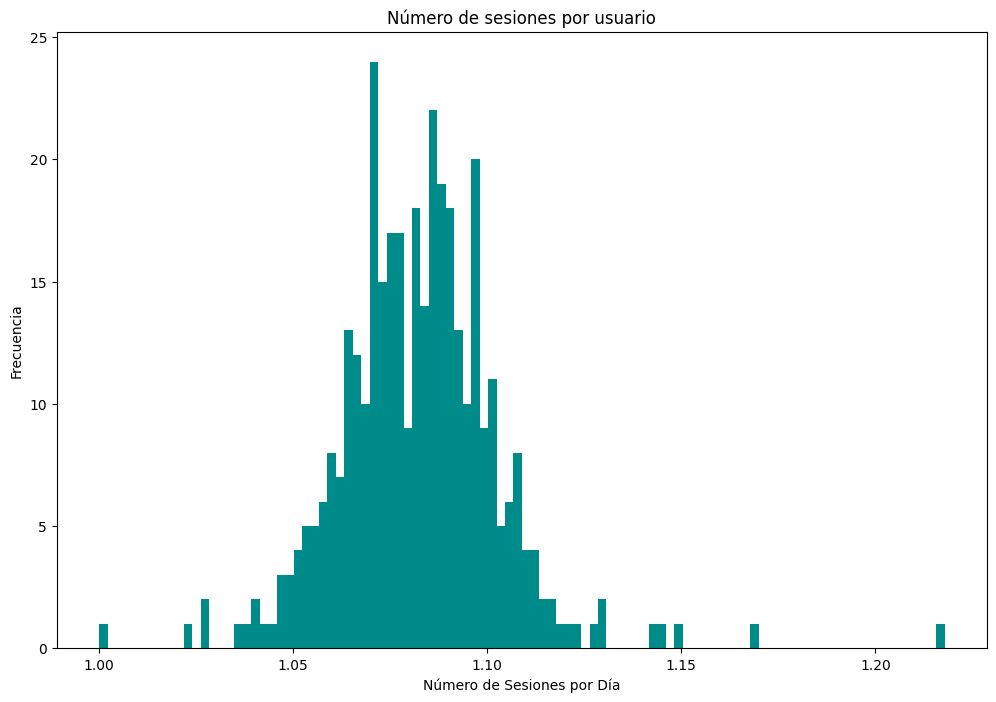

In [19]:
# se grafica un histograma para observar la distribución del número de sesiones por usuario para cada día

sessions_per_user['sessions_per_user'].plot(kind= 'hist',
                                        bins= 100,
                                       title= 'Número de sesiones por usuario',
                                       figsize= (12, 8),
                                       color= 'darkcyan'
                                       )
plt.xlabel('Número de Sesiones por Día')
plt.ylabel('Frecuencia')
plt.show()

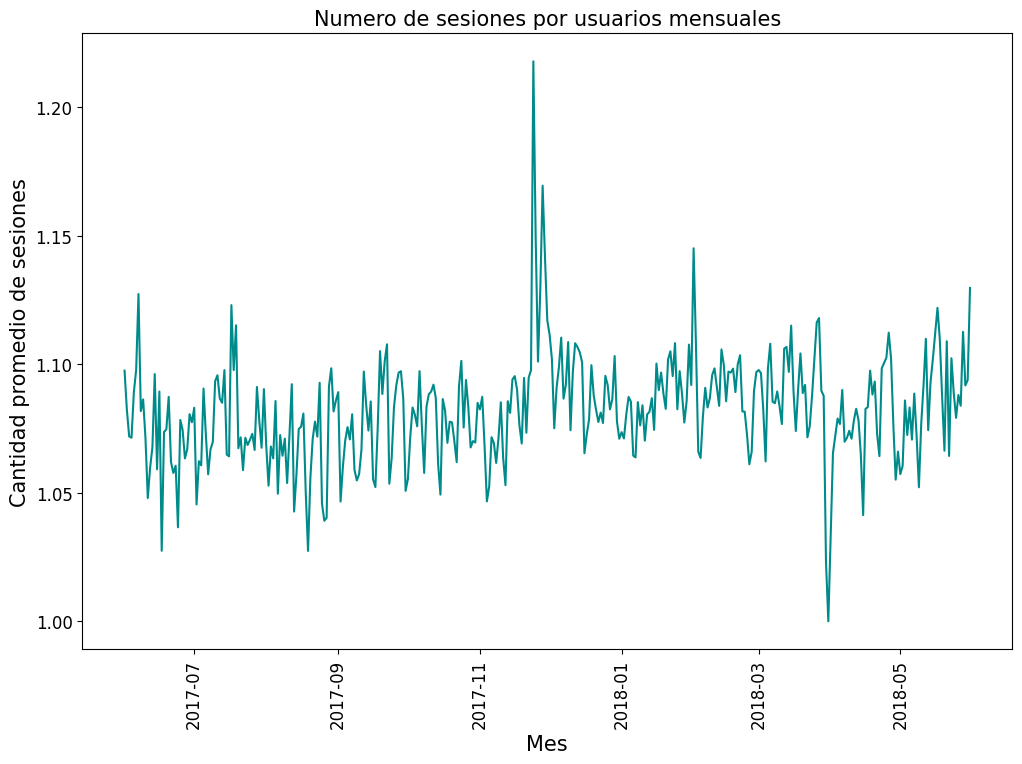

In [20]:
# Se grafica los pedidos totales para cada mes donde se efectuo la compra
sessions_per_user.plot(x = 'session_date',
                  y= 'sessions_per_user',
                  kind= 'line',
                  figsize= [12,8],
                  fontsize= 12,
                  rot= 90,
                  color= 'darkcyan',
                  legend=False     
                       )
plt.title('Numero de sesiones por usuarios mensuales', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Cantidad promedio de sesiones', fontsize=15)


plt.show()

# Observacion: <a id='observacion_5'></a>

Podemos visualizar en el histograma que normalmente el numero de sesiones por usuario por dia es 1 en promedio. En nuestro nuevo grafico se puede evidenciar que en el mes de diciembre la cantidad de sesiones es mayor que el resto de los meses y vemos tambien una caida en el mes de abril.

# ¿Cuál es la duración de cada sesión? <a id='cdcs'></a>

643.506488592098
0    60
dtype: int64


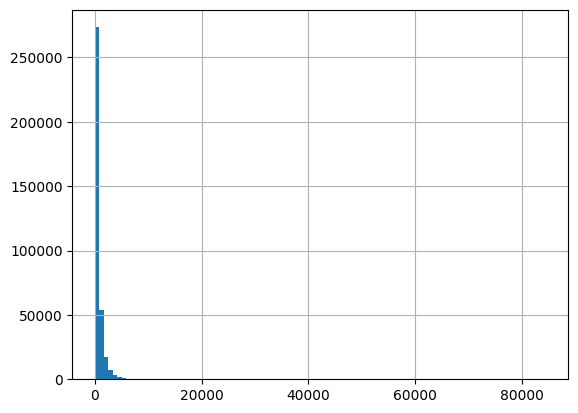

In [21]:
# creamos una nueva columna session_duration_sec y restamos end_ts y start_ts para encontar la duracion
# visualizamos la media y creamos un histograma para visualizar los datos
# por ultimo dado que los datos no son normales se calcula la moda

df1['session_duration_sec'] = (df1['end_ts'] - df1['start_ts']).dt.seconds
print(df1['session_duration_sec'].mean())
df1['session_duration_sec'].hist(bins=100)
asl= df1['session_duration_sec'].mode()
print(asl)

In [22]:
# Utilizamos el metodo describe() para tener una idea mas clara sobre los datos de esta columna

df1['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

# Observacion: <a id='observacion_6'></a>

En este analisis pudimos observar que tenemos datos atipicos, el valor maximo de duracion que tenemos registrado es de 84480 segundos, 1408 minutos unas 24 horas aproximadamente o un dia completo por esa razon decidimos calcular la moda, lo cual nos arrojo que la duracion promedio de un usuario es de 60 segundos o 1 minito.

# ¿Con qué frecuencia los usuarios y las usuarias regresan? <a id='cfur'></a>

In [23]:
# realizamos los calculos con sticky para calcular la frecuencia.

sticky_wau= dau_total/wau_total * 100
print(sticky_wau)
sticky_mau= dau_total/mau_total * 100
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


# Observacion: <a id='observacion_7'></a>

* sticky_wau = 18.512582: Esto significa que aproximadamente el 18.51 % de los usuarios que usan la plataforma en una semana también la usan diariamente.




* sticky_mau = 6.040741: Esto significa que aproximadamente el 6.04 % de los usuarios que usan la plataforma en un mes también la usan diariamente.




* Compromiso diario: el porcentaje de usuarios activos diarios sobre usuarios semanales es relativamente alto (18,51 %). Esto sugiere que una parte considerable de los usuarios interactúan con la plataforma a diario, lo que indica un buen nivel de retención en el corto plazo.




* Desafíos en la retención a largo plazo: el porcentaje de usuarios activos diarios en relación con los usuarios mensuales es significativamente menor (6,04 %). Esto puede indicar que, si bien la plataforma logra atraer usuarios y mantenerlos interesados en el corto plazo, existe un desafío para convertir a estos usuarios en usuarios activos en el largo plazo.


# Ventas <a id='ventas'></a>

In [24]:
df2.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,8117441949118824122
1,2017-06-01 00:25:00,0.55,6819486350016644169
2,2017-06-01 00:27:00,0.37,543063512405337772
3,2017-06-01 00:29:00,0.55,2337504304266998611
4,2017-06-01 07:58:00,0.37,4246138198461172166


# ¿Cuándo la gente empieza a comprar? <a id='cgec'></a>

In [25]:
# agregar columna de mes de inicio de sesión en DataFrame 'df1'
# y en el DataFrame 'df2' la columna de mes de pedido
df1['month_session'] = df1['start_ts'].astype('datetime64[M]')
df2['order_month'] = df2['buy_ts'].astype('datetime64[M]')

In [26]:
# se busca la primer sesión para cada usuario
first_session_dates = df1.groupby('uid')['month_session'].min().reset_index()
# se cambia el nombre de la columna 
first_session_dates.columns = ['uid', 'first_session_month']
first_session_dates.head()

,uid,first_session_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,68042923879230,2017-10-01
3,122254899959089,2017-12-01
4,187667010442558,2018-01-01


In [27]:
# se une al DataFrame 'df1' con merge
visits_log_us_ = df1.merge(first_session_dates, on= 'uid')
visits_log_us_.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,month_session,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1567487796173571554,2017,12,51,2017-12-20,1080,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01


In [28]:
# se busca la fecha para la primera orden para cada usuario
first_buy_dates = df2.groupby('uid')['order_month'].min().reset_index()
# se cambia el nombre de la columna 
first_buy_dates.columns = ['uid', 'first_buy_month']
first_buy_dates.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,577006494733710,2017-10-01
2,587863483079904,2018-02-01
3,1142920977281457,2018-03-01
4,1336537795138412,2017-09-01


In [29]:
# se una al DataFrame 'df2' con merge
orders_log_us_ = df2.merge(first_buy_dates, on= 'uid')
orders_log_us_.head(3)

,buy_ts,revenue,uid,order_month,first_buy_month
0,2017-06-01 00:10:00,17.00,8117441949118824122,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,6819486350016644169,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,543063512405337772,2017-06-01,2017-06-01


In [30]:
# se unen los DataFrame 'visits_log_us_' con 'orders_log_us_'
visits_orders = visits_log_us_.merge(orders_log_us_, on= 'uid')
visits_orders.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,month_session,first_session_month,buy_ts,revenue,order_month,first_buy_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2272063814375341402,2018,5,20,2018-05-20,1440,2018-05-01,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,2272063814375341402,2018,3,10,2018-03-09,1680,2018-03-01,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,2439207879601176229,2017,9,35,2017-09-03,60,2017-09-01,2017-09-01,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-01


In [31]:
# se calcula los días trancurridos cuando el/la usuario/a se convierte en cliente
visits_orders['convertion_time_days'] = (visits_orders['first_buy_month'] - visits_orders['first_session_month']).dt.days
visits_orders.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,month_session,first_session_month,buy_ts,revenue,order_month,first_buy_month,convertion_time_days
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2272063814375341402,2018,5,20,2018-05-20,1440,2018-05-01,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,2272063814375341402,2018,3,10,2018-03-09,1680,2018-03-01,2018-03-01,2018-03-09 20:25:00,2.33,2018-03-01,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,2439207879601176229,2017,9,35,2017-09-03,60,2017-09-01,2017-09-01,2017-09-04 12:46:00,2.44,2017-09-01,2017-09-01,0


In [32]:
# se categoriza el tiempo de conversión
bins = [-1, 0, 1, 7, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]  # Definir los intervalos 
labels = ['Conversion 0d', 'Conversion 1d', 'Conversion 1w', 'Conversion 1m', 'Conversion 2m', 'Conversion 3m', 'Conversion 4m', 'Conversion 5m', 'Conversion 6m', 'Conversion 7m', 'Conversion 8m', 'Conversion 9m', 'Conversion 10m', 'Conversion 11m', 'Conversion 12m']
visits_orders['conversion_category'] = pd.cut(visits_orders['convertion_time_days'], bins=bins, labels=labels)
# se imprime una muestra de filas
visits_orders.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,month_session,first_session_month,buy_ts,revenue,order_month,first_buy_month,convertion_time_days,conversion_category
589301,desktop,2018-01-15 08:42:00,1,2018-01-15 08:41:00,1457537016336779203,2018,1,3,2018-01-15,60,2018-01-01,2017-07-01,2017-08-07 03:08:00,9.78,2017-08-01,2017-07-01,0,Conversion 0d
200369,desktop,2017-10-12 16:46:00,1,2017-10-12 16:23:00,3501596628378158474,2017,10,41,2017-10-12,1380,2017-10-01,2017-06-01,2017-12-23 18:23:00,1.83,2017-12-01,2017-07-01,30,Conversion 1m
717421,desktop,2018-01-30 16:47:00,5,2018-01-30 16:31:00,3029354755634723916,2018,1,5,2018-01-30,960,2018-01-01,2018-01-01,2018-01-30 16:36:00,0.37,2018-01-01,2018-01-01,0,Conversion 0d
535729,desktop,2018-05-25 10:34:00,1,2018-05-25 10:21:00,6417926052566312305,2018,5,21,2018-05-25,780,2018-05-01,2018-01-01,2018-05-11 18:09:00,3.05,2018-05-01,2018-01-01,0,Conversion 0d
14066,desktop,2017-12-23 14:50:00,1,2017-12-23 14:38:00,3263486045884611639,2017,12,51,2017-12-23,720,2017-12-01,2017-06-01,2017-12-26 16:45:00,3.05,2017-12-01,2017-06-01,0,Conversion 0d


In [33]:
# ahora se crea una tabla dinámica para saber la cantidad de pedidos que hicieron los usuarios por cohorte (que son los que 
# se registracion por primera vez) y el tiempo que tardaron en hacer su primer pedido 'conversion_category'
first_session_cohort = visits_orders.pivot_table(index= 'first_session_month',
                                       columns= 'conversion_category',
                                       values= 'uid',
                                       aggfunc= 'nunique')

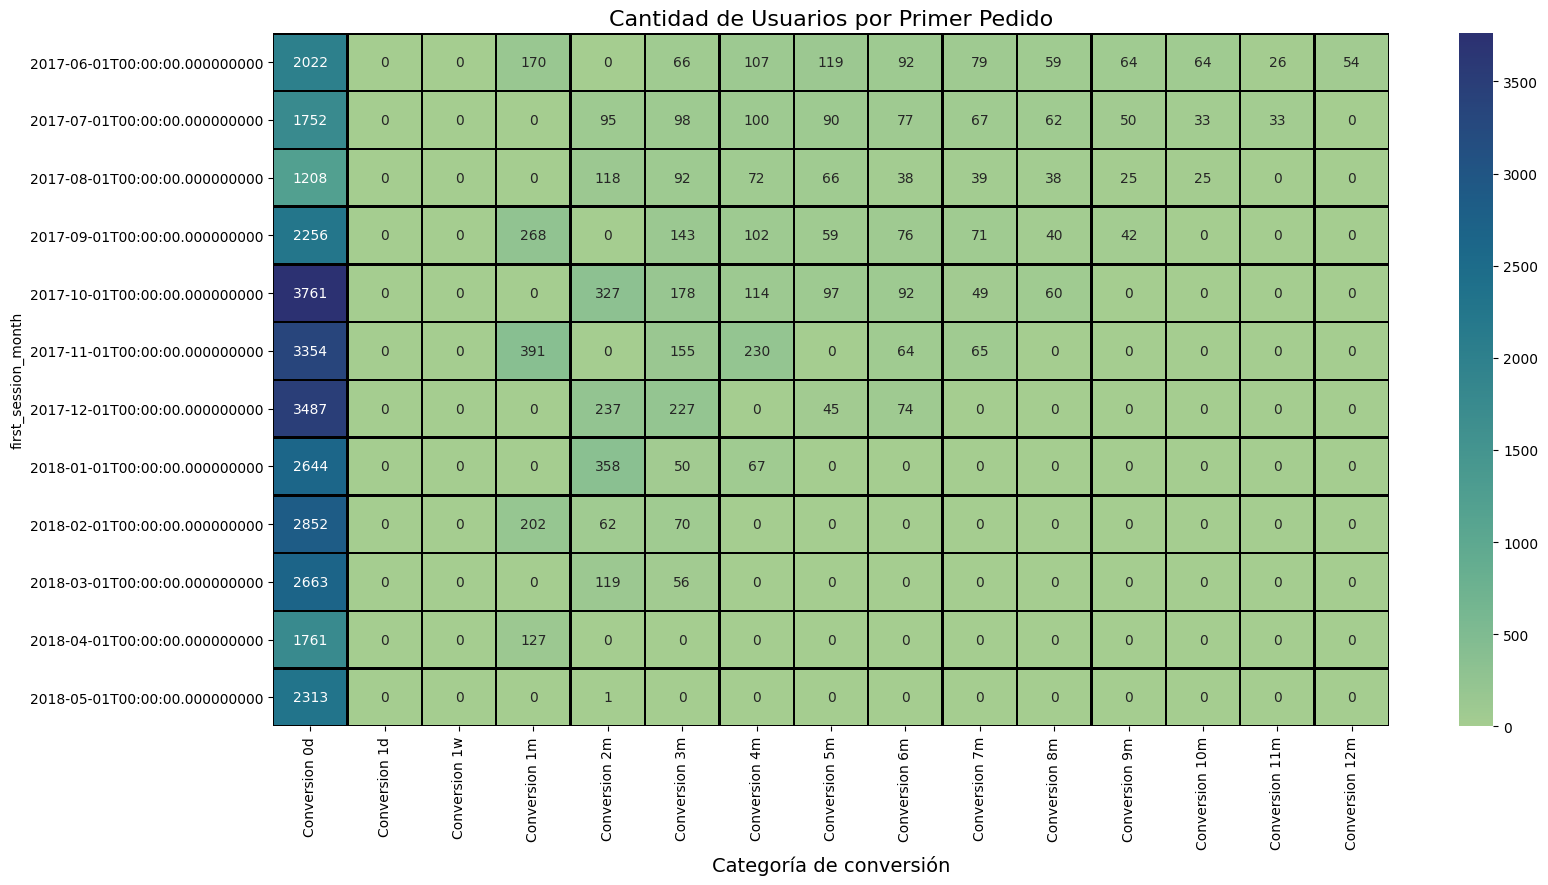

In [34]:
# se grafica un mapa de calor a partir de first_session_cohort
plt.figure(figsize=(18, 9))

sns.heatmap(first_session_cohort, annot=True, fmt='g', cmap="crest", linewidths= 1, linecolor='black')

plt.title('Cantidad de Usuarios por Primer Pedido', fontsize= 16)
plt.xlabel('Categoría de conversión', fontsize= 14)


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Con esta visualización es super claro identificar diferencias
</div>

In [35]:
#Realizamos la suma por categoria de conversion para obtener la cantidad total
first_session_cohort.sum(axis=0)

conversion_category
Conversion 0d     30073
Conversion 1d         0
Conversion 1w         0
Conversion 1m      1158
Conversion 2m      1317
Conversion 3m      1135
Conversion 4m       792
Conversion 5m       476
Conversion 6m       513
Conversion 7m       370
Conversion 8m       259
Conversion 9m       181
Conversion 10m      122
Conversion 11m       59
Conversion 12m       54
dtype: int64

In [36]:
# Ahora las cohortes se definen por el periodo de tiempo de conversión
# se emplea una tabla dinámica para saber la cantidad de pedidos que hicieron de acuerdo a la fuente del anuncio
convertion_time_cohort = visits_orders.pivot_table(index= 'conversion_category',
                             columns= 'source_id',
                             values= 'uid',
                             aggfunc= 'nunique')

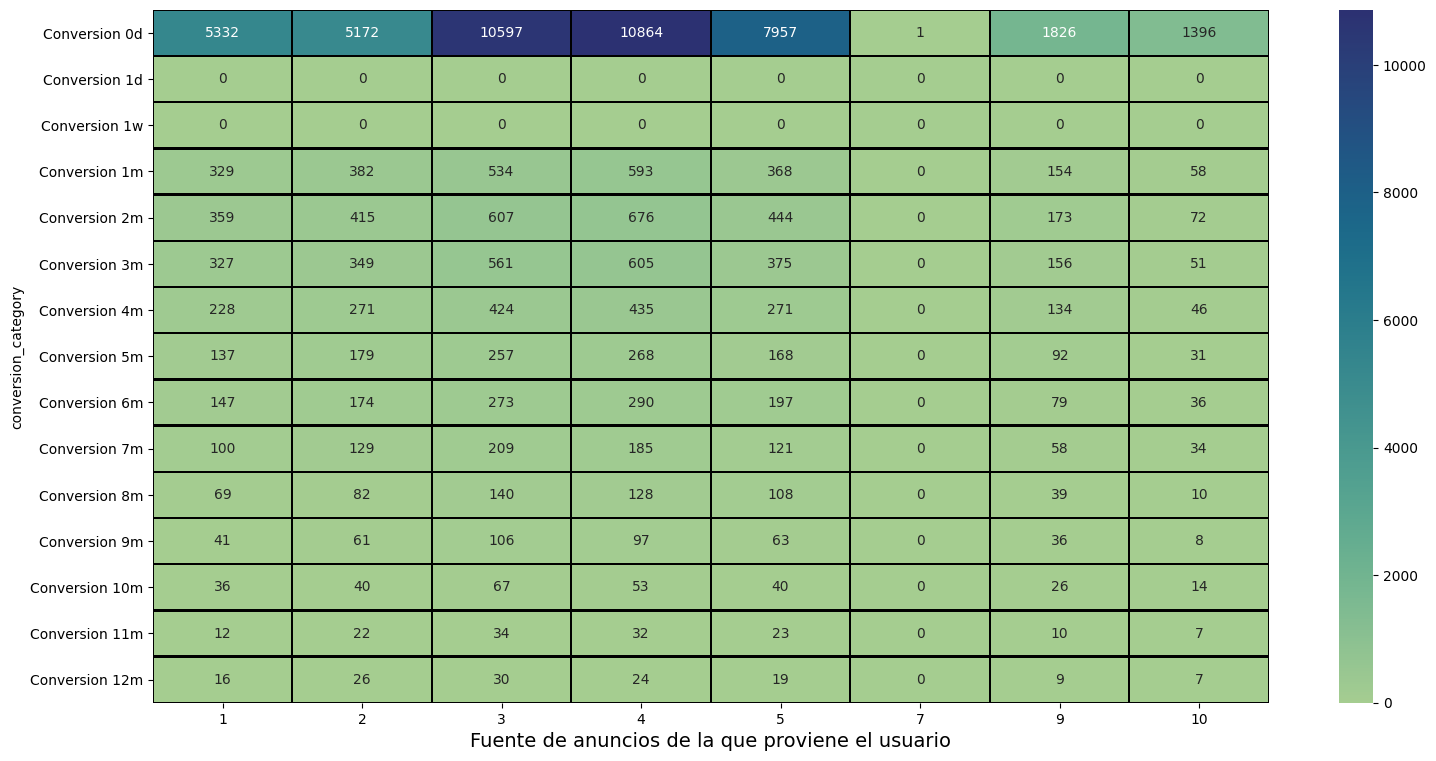

In [37]:
# se grafica un mapa de calor a partir de convertion_time_cohort
plt.figure(figsize=(18, 9))

sns.heatmap(convertion_time_cohort, annot=True, fmt='g', cmap="crest",  linewidths= 1, linecolor='black')

plt.title('', fontsize= 16)
plt.xlabel('Fuente de anuncios de la que proviene el usuario', fontsize= 14)


plt.show()

In [38]:
# Realizamos la sum por fuente de anuncios para visualizar que fuente genera mayores usuarios
convertion_time_cohort.sum(axis=0)

source_id
1      7133
2      7302
3     13839
4     14250
5     10154
7         1
9      2792
10     1770
dtype: int64

# Observacion: <a id='observacion_8'></a>

Por lo general nuestros usuarios en su gran mayoria compran el primer dia en el que visitan nuestra aplicacion o pagina web tenemos en total unos 30073 usuarios que compraron desde su primera visita, luego podemos notar alrededor de 3000 usuarios que se decidieron compran luego de 1, 2 o 3 meses de haber visitado nuestra pagina web o aplicacion. 

Tambien analizamos las fuentes de donde provienen nuestros clientes para determinar cuales estan siendo mas efectivas y pudimos notar que las fuentes 3, 4 y 5 son las que nos estan generando mayores usuarios de 10000 a 14000, las fuentes 1 y 2 son los que tambien estan generando un flujo aceptable de usuarios de 7000 a 7300, las fuentes 9 y 10 si estan generando usuarios de 1700 a 2800, pero no con tan alto flujo como las anteriores  y por ultimo tenemos la fuente 7 la cual no esta generando absolutamente ningun usuario apenas solo 1, por lo que deberiamos descartarla.

# ¿Cuántos pedidos hacen durante un período de tiempo dado? <a id='cphdptd'></a>

In [39]:
#agrupamos los datos por order_month y aplicamos el parametro count y buscamos los uid unicos con el metodo agg
order_per_month= orders_log_us_.groupby(['order_month'])['uid'].agg(['count', 'nunique']).reset_index()
# cambiamos los nombres de las columnas
order_per_month.columns= ['order_month', 'n_order', 'n_users']
order_per_month

,order_month,n_order,n_users
0,2017-06-01,2353,2022
1,2017-07-01,2362,1983
2,2017-08-01,1803,1471
3,2017-09-01,3383,2748
4,2017-10-01,5677,4673
5,2017-11-01,5644,4543
6,2017-12-01,6206,4937
7,2018-01-01,4721,3898
8,2018-02-01,5280,4258
9,2018-03-01,5325,4181


In [40]:
# calculamos las cantidad de ordenes por usuario mensuales
order_per_month['order_per_user']= order_per_month['n_order'] / order_per_month['n_users']

In [41]:
order_per_month

,order_month,n_order,n_users,order_per_user
0,2017-06-01,2353,2022,1.163699
1,2017-07-01,2362,1983,1.191125
2,2017-08-01,1803,1471,1.225697
3,2017-09-01,3383,2748,1.231077
4,2017-10-01,5677,4673,1.214851
5,2017-11-01,5644,4543,1.242351
6,2017-12-01,6206,4937,1.257039
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5280,4258,1.240019
9,2018-03-01,5325,4181,1.273619


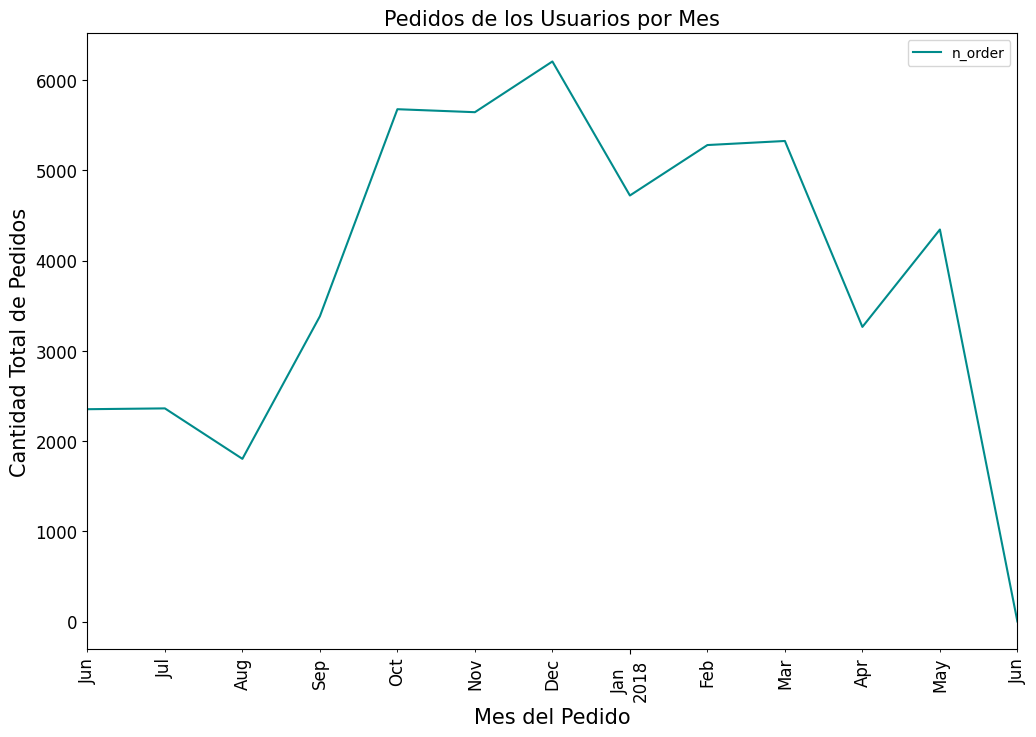

In [42]:
# Se grafica los pedidos totales para cada mes donde se efectuo la compra
order_per_month.plot(x = 'order_month',
                  y= 'n_order',
                  kind= 'line',
                  figsize= [12,8],
                  fontsize= 12,
                  rot= 90,
                  color= 'darkcyan'
                       )
plt.title('Pedidos de los Usuarios por Mes', fontsize=15)
plt.xlabel('Mes del Pedido', fontsize=15)
plt.ylabel('Cantidad Total de Pedidos', fontsize=15)


plt.show()

# Observacion: <a id='observacion_9'></a>

En este estudios de analisis de la cantidad de pedidos realizados por los usuarios mensualmente. podemos notar que las mejores ventas se presentaron desde octubre de 2017 a marzo de 2018. con cantidades de pedidos que van desde los 5000 mil hasta un poco mas de los 6000.

# ¿Cuál es el tamaño promedio de compra? <a id='ctpc'></a>

In [43]:
# Se calcula el promedio de los pedidos y el promedio de pedidos por usuario/a 
total_orders_mean = order_per_month['n_order'].mean().round()
orders_per_user_mean = order_per_month['order_per_user'].mean().round()
print(f'El promedio de pedidos que se hacen mensual es de {total_orders_mean}')
print(f'Los pedidos en promedio que se hacen por usuario/a mensual son de {orders_per_user_mean}')

El promedio de pedidos que se hacen mensual es de 3874.0
Los pedidos en promedio que se hacen por usuario/a mensual son de 1.0


# Observacion: <a id='observacion_10'></a>

El tamaño promedio de compra total mensual es de 3874 pedidos mensuales y el promedio de pedidos por usuario mensual es de 1 pedido mensual.

# ¿Cuánto dinero traen? (LTV) <a id='cdt'></a>

In [44]:
cohort_sizes = orders_log_us_.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [45]:
cohorts = orders_log_us_.groupby(['first_buy_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_buy_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [46]:
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report.head()

,first_buy_month,n_buyers,order_month,revenue
0,2017-06-01,2022,2017-06-01,9557.49
1,2017-06-01,2022,2017-07-01,981.82
2,2017-06-01,2022,2017-08-01,885.34
3,2017-06-01,2022,2017-09-01,1931.30
4,2017-06-01,2022,2017-10-01,2068.58


In [47]:
report['age'] = (
    report['order_month'] - report['first_buy_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']

report.head()

,first_buy_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2022,2017-06-01,9557.49,0,4.726751
1,2017-06-01,2022,2017-07-01,981.82,1,0.485569
2,2017-06-01,2022,2017-08-01,885.34,2,0.437854
3,2017-06-01,2022,2017-09-01,1931.30,3,0.955143
4,2017-06-01,2022,2017-10-01,2068.58,4,1.023037


In [48]:

output = report.pivot_table(
    index='first_buy_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.726751,0.485569,0.437854,0.955143,1.023037,0.735865,0.950198,0.581879,0.553487,0.606088,0.571543,0.256983
2017-07-01,6.013345,0.335385,0.623855,0.359162,0.176883,0.156129,0.120271,0.141894,0.161316,0.147222,0.155754,
2017-08-01,5.280373,0.472337,0.458817,0.391563,0.494412,0.283747,0.210818,0.405303,0.292425,0.188115,,
2017-09-01,5.648907,1.118453,0.519938,3.978876,0.400869,0.647569,0.702152,0.243339,0.184149,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11-01,5.159358,0.398808,0.199703,0.325191,0.147903,0.053919,0.115012,,,,,
2017-12-01,4.742434,0.260553,0.925731,1.066005,0.313144,0.338279,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02-01,4.156987,0.278274,0.078515,0.074144,,,,,,,,


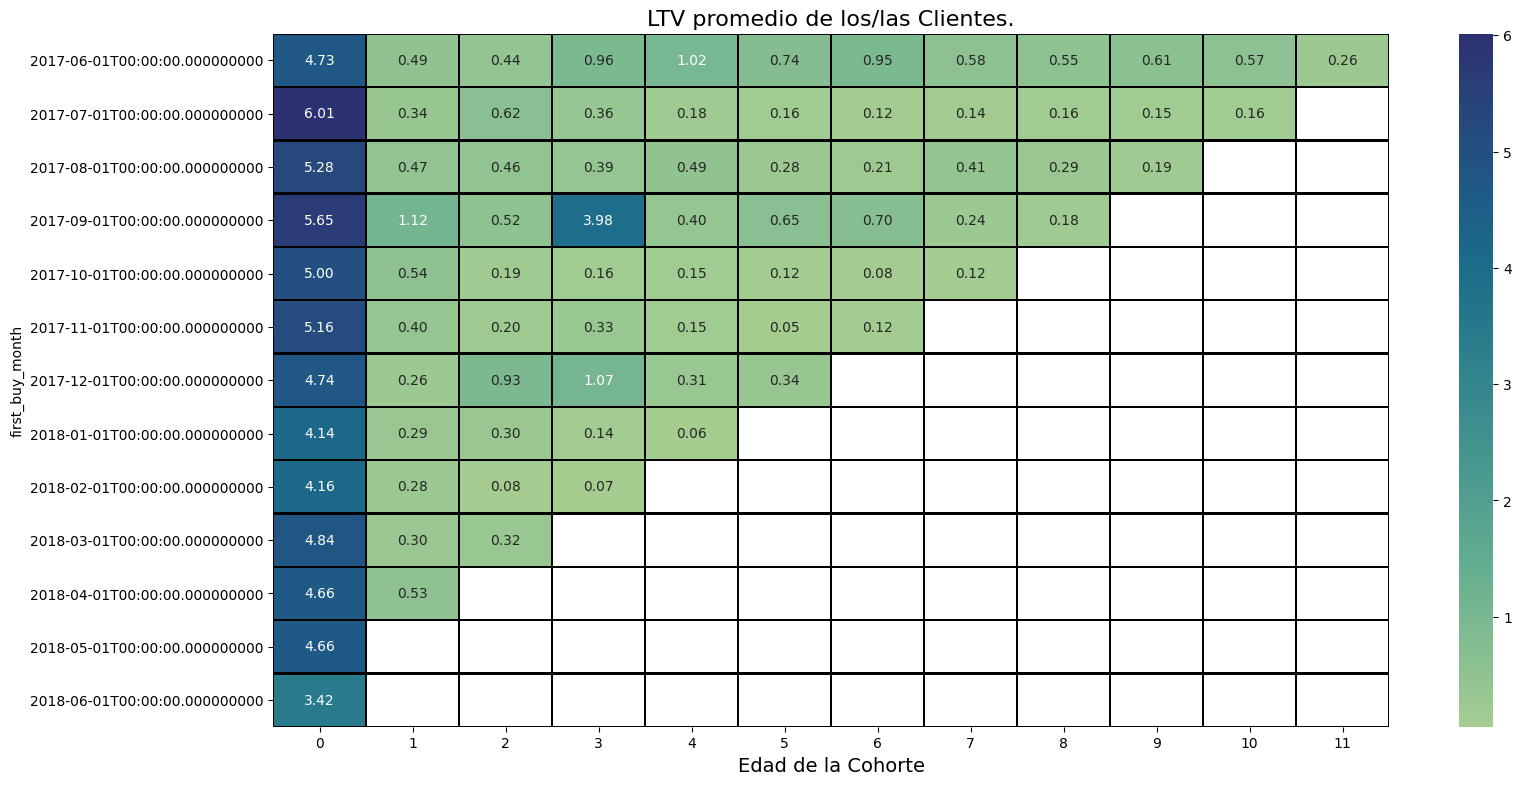

In [49]:
# se grafica un mapa de calor a partir de output
plt.figure(figsize=(18, 9))

sns.heatmap(output, annot=True, fmt='.2f', cmap="crest",  linewidths= 1, linecolor='black')

plt.title('LTV promedio de los/las Clientes.', fontsize= 16)
plt.xlabel('Edad de la Cohorte', fontsize= 14)


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la corrección!
</div>

In [50]:
output.sum(axis=1).round()

first_buy_month
2017-06-01    12.0
2017-07-01     8.0
2017-08-01     8.0
2017-09-01    13.0
2017-10-01     6.0
2017-11-01     6.0
2017-12-01     8.0
2018-01-01     5.0
2018-02-01     5.0
2018-03-01     5.0
2018-04-01     5.0
2018-05-01     5.0
2018-06-01     3.0
dtype: float64

# 


# Observacion: <a id='observacion_11'></a>

Podemos evidenciar nuevamente que los mayores ingresos se generan desde la edad de cohorte 0, esto nos confirma que la moryoria de nuestros clientes compran en su primera visita. los mejores ingresos los tenemos en el cohoter de junio y el cohorte de septiembre luego los demas cohortes se mantienen en un estandar de entre 4 y 7 excepto junio de 2018 que si esta en 3 pero esto pudiera estar generandose devido a que no estan todos los registros de este mes.

# Marketing <a id='marketing'></a>

In [51]:
df3.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) <a id='cdg'></a>

In [52]:
report_ = pd.merge(report, df3, left_on='order_month', right_on='dt')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_buy_month,n_buyers,order_month,revenue,age,ltv,source_id,dt,costs,cac
0,2017-06-01,2022,2017-06-01,9557.49,0,4.726751,1,2017-06-01,75.20,0.037191
1,2017-06-01,2022,2017-06-01,9557.49,0,4.726751,2,2017-06-01,132.56,0.065559
2,2017-06-01,2022,2017-06-01,9557.49,0,4.726751,3,2017-06-01,349.38,0.172789
3,2017-06-01,2022,2017-06-01,9557.49,0,4.726751,4,2017-06-01,76.74,0.037953
4,2017-06-01,2022,2017-06-01,9557.49,0,4.726751,5,2017-06-01,73.24,0.036222


In [53]:
# Se agrupa el total de los costos de marketing a lo largo del tiempo
source_costs = report_.groupby('dt')['costs'].sum().sort_values(ascending= False)
source_costs

dt
2018-03-01    14372.80
2018-02-01    12408.84
2017-12-01     7435.05
2017-11-01     7418.46
2018-05-01     7164.72
2018-01-01     6868.72
2017-10-01     5186.20
2017-09-01     2155.04
2017-08-01     1526.97
2017-07-01      756.08
2017-06-01      735.26
Name: costs, dtype: float64

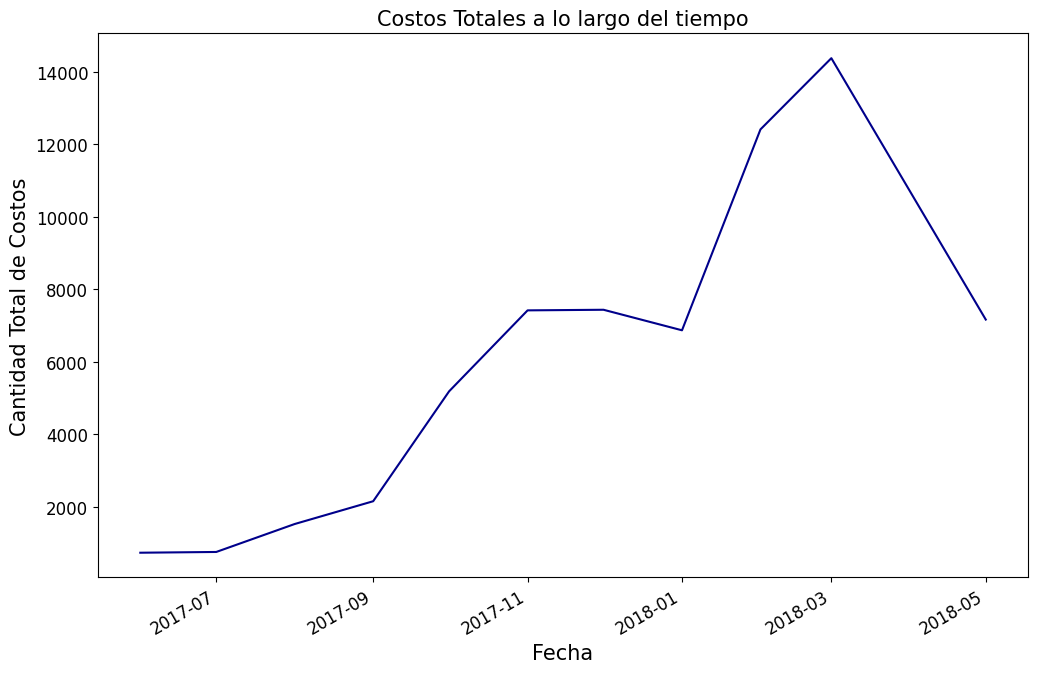

In [54]:
# se grafican los costos totales a los largo del tiempo
source_costs.plot(
                  kind= 'line',
                  figsize= [12,8],
                  fontsize= 12,
                  color= 'darkblue'
                       )
plt.title('Costos Totales a lo largo del tiempo', fontsize=15)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad Total de Costos', fontsize=15)

plt.show()

# Observacion: <a id='observacion_12'></a>

Los meses con mayores costos fueron Febrero de 2018 con (12409) y Marzo de 2018 con (14373), luego el mes 4 y 5 se redujo a los costos por asi decirlo estandar que se venian veniendo desde meses anteriores los cuales son costos no mayores a 7500.

# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? <a id='cfcaccuf'></a>

In [55]:
# se agrupan la suma del costo de adquisición por la fuente del anuncio
cac_by_source = report_.groupby('source_id')['cac'].sum()
cac_by_source

source_id
1      1.669532
2      3.520368
3     12.475347
4      3.716047
5      4.504085
9      0.512617
10     0.435294
Name: cac, dtype: float64

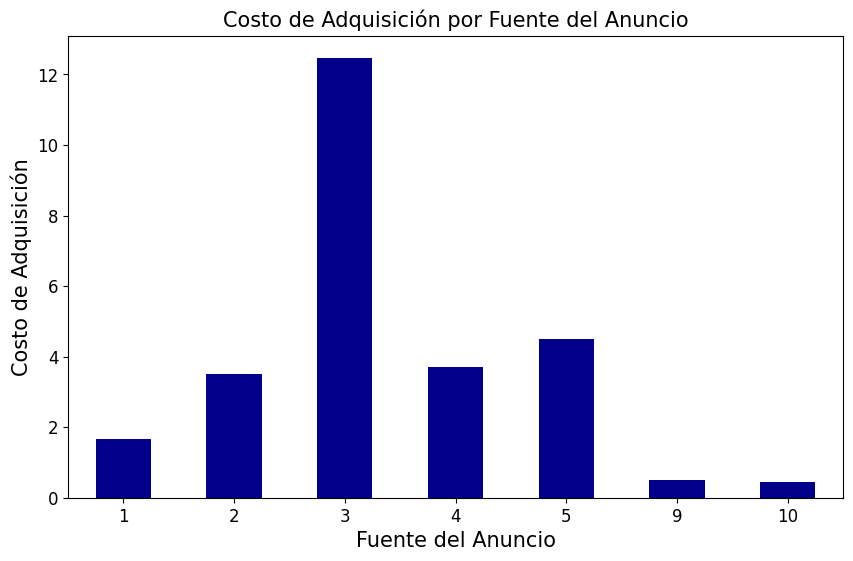

In [56]:
# se grafican el cac por fuente del anuncio
cac_by_source.plot(
                  kind= 'bar',
                  figsize= [10,6],
                  fontsize= 12,
                  rot= 0,
                  color= 'darkblue'
                       )
plt.title('Costo de Adquisición por Fuente del Anuncio', fontsize=15)
plt.xlabel('Fuente del Anuncio', fontsize=15)
plt.ylabel('Costo de Adquisición', fontsize=15)

plt.show()

# Observacion: <a id='observacion_13'></a>

Nuestros análisis previos identificaron a las fuentes 3 y 4 como las principales generadoras de clientes, destacando la fuente 4 por su mayor volumen de usuarios. Sin embargo, el nuevo análisis revela que, aunque la fuente 3 también contribuye, su costo por usuario es aproximadamente tres veces superior al de la fuente 4.

En conclusión, la fuente 4 se posiciona como la más efectiva tanto por su rentabilidad como por su capacidad de atracción. Proponemos un análisis más profundo de las estrategias implementadas en la fuente 4 para evaluar su replicabilidad en las demás fuentes. Especialmente, en la fuente 3 se debe priorizar la optimización de su costo de adquisición. 

# ¿Cuán rentables eran las inversiones? (ROMI) <a id='crei'></a>

In [57]:
report_['romi'] = report_['ltv'] / report_['cac']
output2 = report_.pivot_table(
    index='first_buy_month', columns='age', values='romi', aggfunc='mean'
).round()

output2.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,264.0,64.0,39.0,80.0,62.0,28.0,42.0,19.0,29.0,37.0,,23.0
2017-07-01,754.0,29.0,50.0,21.0,6.0,7.0,4.0,7.0,9.0,,13.0,
2017-08-01,320.0,27.0,19.0,10.0,15.0,6.0,7.0,17.0,,11.0,,
2017-09-01,602.0,86.0,25.0,223.0,17.0,43.0,55.0,,21.0,,,
2017-10-01,649.0,44.0,18.0,11.0,17.0,16.0,,22.0,,,,
2017-11-01,400.0,35.0,13.0,34.0,18.0,,20.0,,,,,
2017-12-01,451.0,18.0,105.0,141.0,,64.0,,,,,,
2018-01-01,224.0,26.0,31.0,,9.0,,,,,,,
2018-02-01,392.0,31.0,,12.0,,,,,,,,


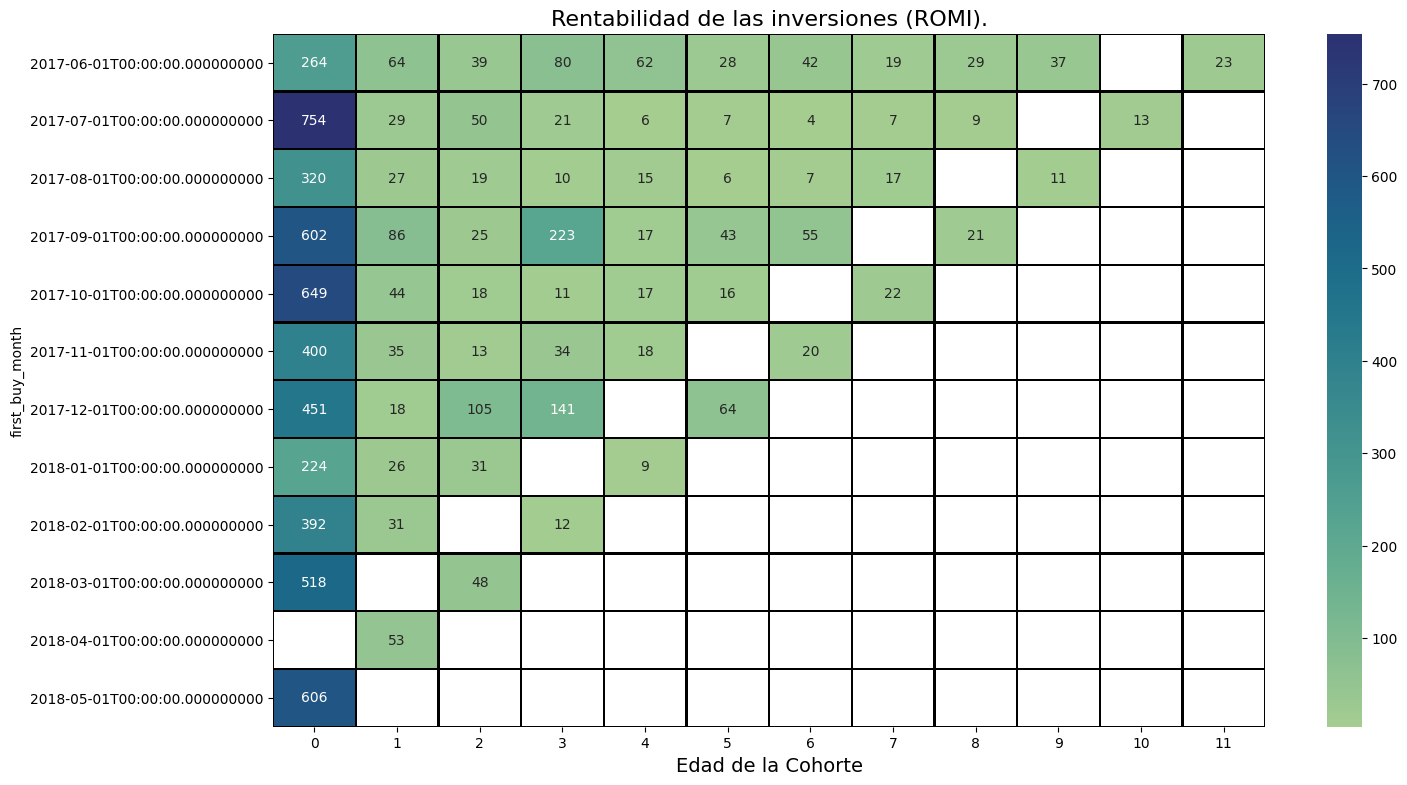

In [58]:
# se grafica un mapa de calor a partir de result_romi
plt.figure(figsize=(16, 9))

sns.heatmap(output2, annot=True, fmt='0.0f', cmap="crest",  linewidths= 1, linecolor='black')

plt.title('Rentabilidad de las inversiones (ROMI).', fontsize= 16)
plt.xlabel('Edad de la Cohorte', fontsize= 14)


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con esta visualización y cálculo!
</div>

In [59]:
output3 = report_.pivot_table(
    index='first_buy_month', columns='age', values='romi', aggfunc='mean'
).round().cumsum(axis=1)


output3.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,264.0,328.0,367.0,447.0,509.0,537.0,579.0,598.0,627.0,664.0,,687.0
2017-07-01,754.0,783.0,833.0,854.0,860.0,867.0,871.0,878.0,887.0,,900.0,
2017-08-01,320.0,347.0,366.0,376.0,391.0,397.0,404.0,421.0,,432.0,,
2017-09-01,602.0,688.0,713.0,936.0,953.0,996.0,1051.0,,1072.0,,,
2017-10-01,649.0,693.0,711.0,722.0,739.0,755.0,,777.0,,,,
2017-11-01,400.0,435.0,448.0,482.0,500.0,,520.0,,,,,
2017-12-01,451.0,469.0,574.0,715.0,,779.0,,,,,,
2018-01-01,224.0,250.0,281.0,,290.0,,,,,,,
2018-02-01,392.0,423.0,,435.0,,,,,,,,


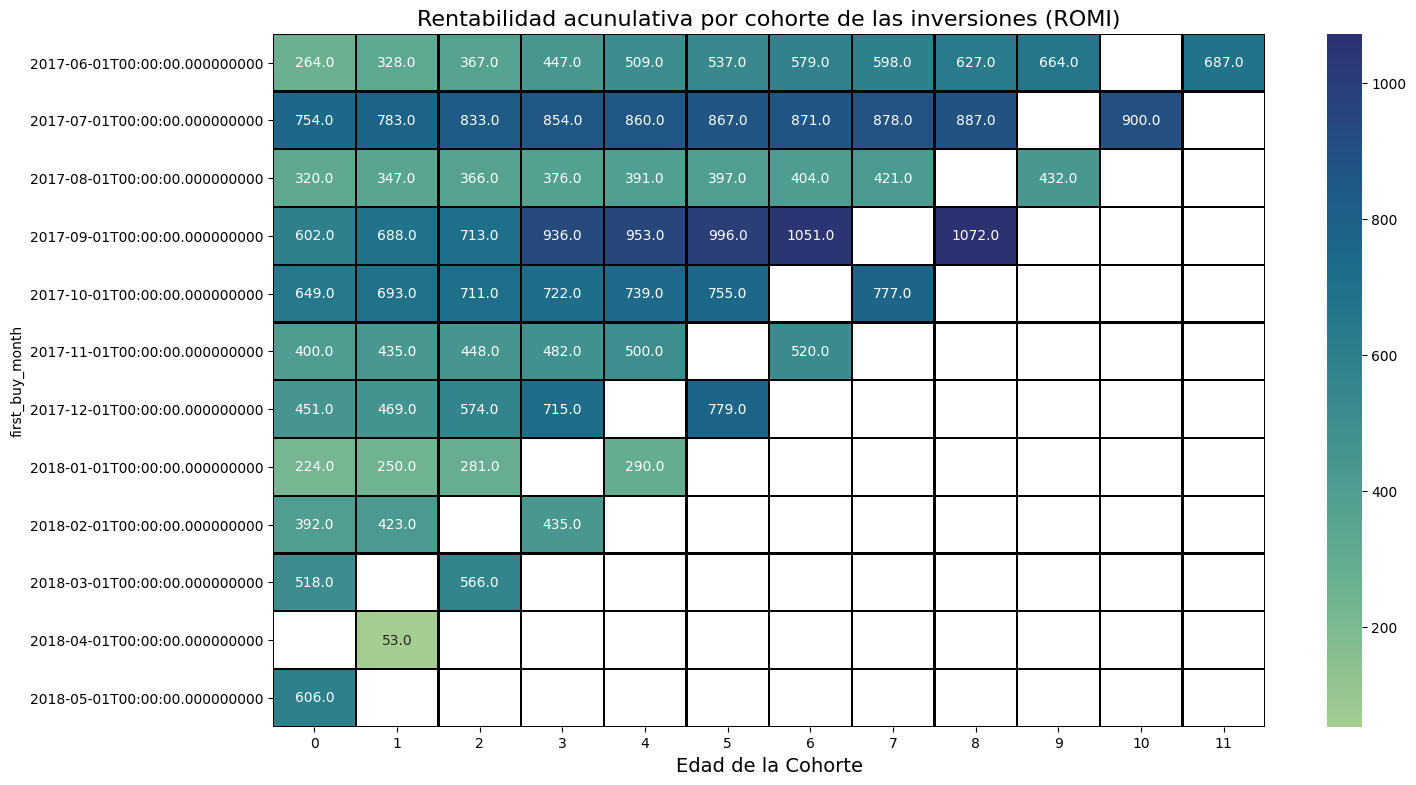

In [60]:
#se grafica un mapa de calor a partir de output3
plt.figure(figsize=(16, 9))

sns.heatmap(output3, annot=True, fmt='.1f', cmap="crest",  linewidths= 1, linecolor='black')

plt.title('Rentabilidad acunulativa por cohorte de las inversiones (ROMI)', fontsize= 16)
plt.xlabel('Edad de la Cohorte', fontsize= 14)


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la corrección!
</div>

In [61]:
output3.cumsum(axis=1).mean(axis=0).round()

age
0      471.0
1      852.0
2     1448.0
3     2122.0
4     2645.0
5     3624.0
6     4036.0
7     4599.0
8     6285.0
9     4187.0
10    8487.0
11    5607.0
dtype: float64

In [62]:
favorite_platform= df1['device'].value_counts().reset_index()
favorite_platform.columns= ['platform', 'count']
favorite_platform['%']= ((favorite_platform['count'] * 100) / 359400).round() 
favorite_platform

,platform,count,%
0,desktop,262567,73.0
1,touch,96833,27.0


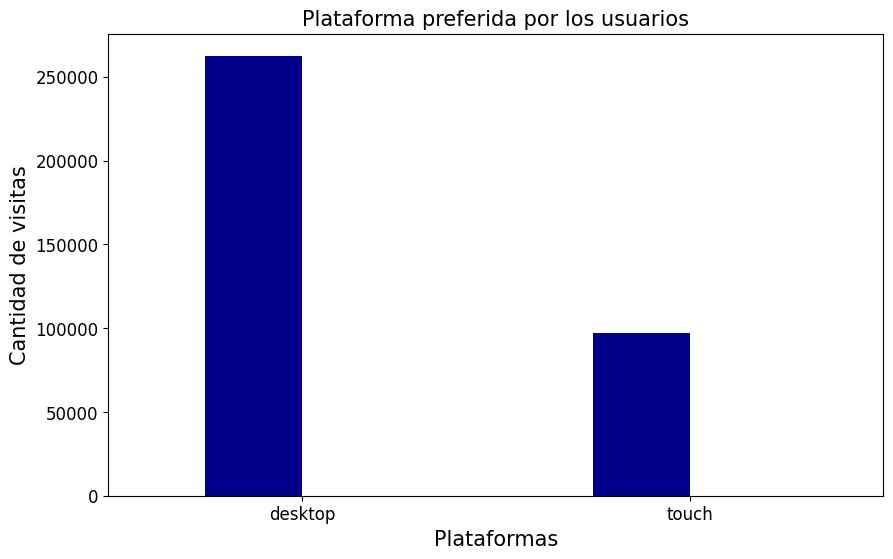

In [63]:
# se grafican el cac por fuente del anuncio
favorite_platform.plot(
                  kind= 'bar',
                  x= 'platform',
                  figsize= [10,6],
                  fontsize= 12,
                  rot= 0,
                  color= 'darkblue',
                  legend= False
                       )
plt.title('Plataforma preferida por los usuarios', fontsize=15)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Cantidad de visitas', fontsize=15)

plt.show()

# Observacion: <a id='observacion_14'></a>

El análisis de las cohortes revela que el costo de adquisición de cada usuario se recupera rápidamente, generando un margen de beneficio promedio entre 400 y 900 mensuales. Este resultado es altamente positivo, dado el bajo costo de adquisición.

Respecto a los dispositivos utilizados, observamos una clara preferencia por las computadoras de escritorio, con un 73% del tráfico total. Los dispositivos móviles representan el 27% restante. Estos datos sugieren que podríamos explorar estrategias de optimización para dispositivos móviles a fin de aumentar su contribución a los ingresos.

# Conclusion General <a id='cg'></a>

## Visitas

### ¿Cuántas personas lo usan cada día, semana y mes?

* Número de usuarios activos diarios (únicos):  908


* Número de usuarios activos semanales:  5716


* Número de usuarios activos mensuales:   23228

Con los datos analizados podemos saber que en promedio una 908 personas lo usan diario, 5716 lo usan semanal y 23228 lo usan mensualmente.

### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

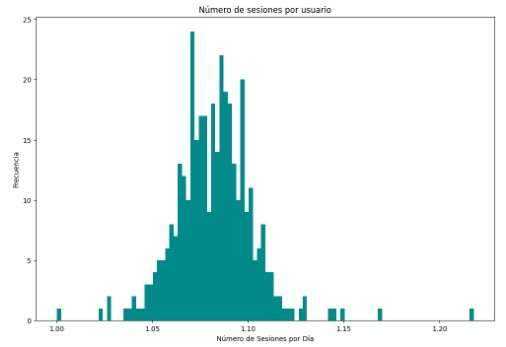

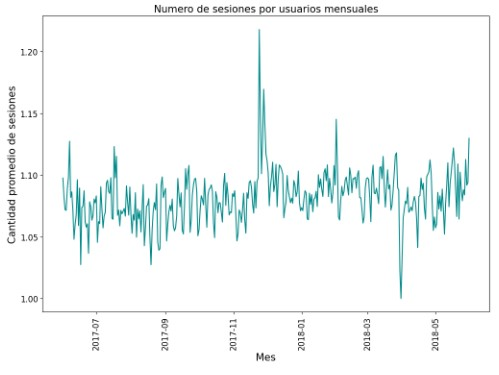

Podemos visualizar en el histograma que normalmente el numero de sesiones por usuario por dia es 1 en promedio. En nuestro nuevo grafico se puede evidenciar que en el mes de diciembre la cantidad de sesiones es mayor que el resto de los meses y vemos tambien una caida en el mes de abril.

### ¿Cuál es la duración de cada sesión?

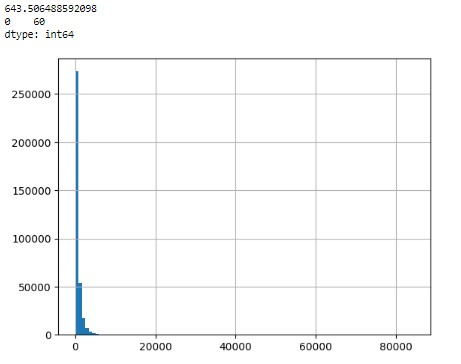

En este analisis pudimos observar que tenemos datos atipicos, el valor maximo de duracion que tenemos registrado es de 84480 segundos, 1408 minutos unas 24 horas aproximadamente o un dia completo por esa razon decidimos calcular la moda, lo cual nos arrojo que la duracion promedio de un usuario es de 60 segundos o 1 minito.

###  ¿Con qué frecuencia los usuarios y las usuarias regresan?

* sticky_wau = 18.512582: Esto significa que aproximadamente el 18.51 % de los usuarios que usan la plataforma en una semana también la usan diariamente.




* sticky_mau = 6.040741: Esto significa que aproximadamente el 6.04 % de los usuarios que usan la plataforma en un mes también la usan diariamente.




* Compromiso diario: el porcentaje de usuarios activos diarios sobre usuarios semanales es relativamente alto (18,51 %). Esto sugiere que una parte considerable de los usuarios interactúan con la plataforma a diario, lo que indica un buen nivel de retención en el corto plazo.




* Desafíos en la retención a largo plazo: el porcentaje de usuarios activos diarios en relación con los usuarios mensuales es significativamente menor (6,04 %). Esto puede indicar que, si bien la plataforma logra atraer usuarios y mantenerlos interesados en el corto plazo, existe un desafío para convertir a estos usuarios en usuarios activos en el largo plazo.

## Ventas

### ¿Cuándo la gente empieza a comprar?

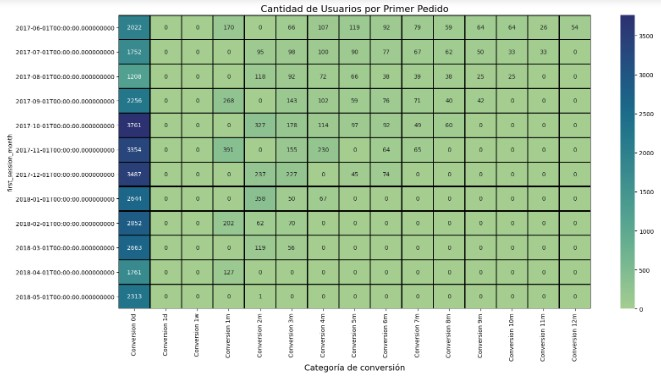

conversion_category

* Conversion 0d: 30073

* Conversion 1d:  0

* Conversion 1w:  0

* Conversion 1m: 1158

* Conversion 2m:      1317

* Conversion 3m:      1135

* Conversion 4m:       792

* Conversion 5m:       476

* Conversion 6m:       513

* Conversion 7m:       370

* Conversion 8m:       259

* Conversion 9m:       181

* Conversion 10m:      122

* Conversion 11m:       59

* Conversion 12m:       54

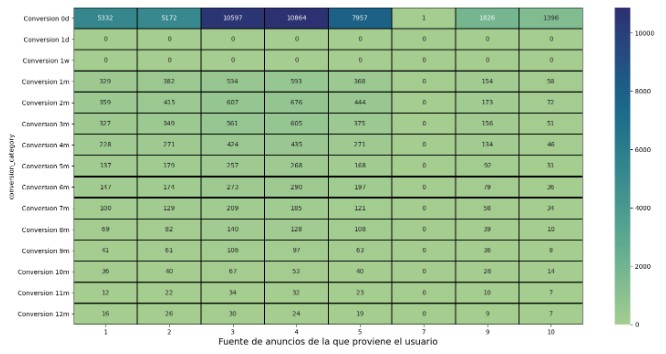

source_id

* 1:      7133
* 2:      7302
* 3:     13839
* 4:     14250
* 5:     10154
* 7:         1
* 9:      2792
* 10:     1770


Por lo general nuestros usuarios en su gran mayoria compran el primer dia en el que visitan nuestra aplicacion o pagina web tenemos en total unos 30073 usuarios que compraron desde su primera visita, luego podemos notar alrededor de 3000 usuarios que se decidieron compran luego de 1, 2 o 3 meses de haber visitado nuestra pagina web o aplicacion.

Tambien analizamos las fuentes de donde provienen nuestros clientes para determinar cuales estan siendo mas efectivas y pudimos notar que las fuentes 3, 4 y 5 son las que nos estan generando mayores usuarios de 10000 a 14000, las fuentes 1 y 2 son los que tambien estan generando un flujo aceptable de usuarios de 7000 a 7300, las fuentes 9 y 10 si estan generando usuarios de 1700 a 2800, pero no con tan alto flujo como las anteriores y por ultimo tenemos la fuente 7 la cual no esta generando absolutamente ningun usuario apenas solo 1, por lo que deberiamos descartarla.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

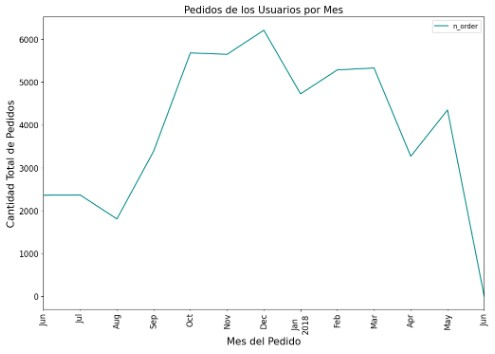

En este estudios de analisis de la cantidad de pedidos realizados por los usuarios mensualmente. podemos notar que las mejores ventas se presentaron desde octubre de 2017 a marzo de 2018. con cantidades de pedidos que van desde los 5000 mil hasta un poco mas de los 6000.

### ¿Cuál es el tamaño promedio de compra?

* El promedio de pedidos que se hacen mensual es de 3874.0



* Los pedidos en promedio que se hacen por usuario/a mensual son de 1.0

El tamaño promedio de compra total mensual es de 3874 pedidos mensuales y el promedio de pedidos por usuario mensual es de 1 pedido mensual.

### ¿Cuánto dinero traen? (LTV)

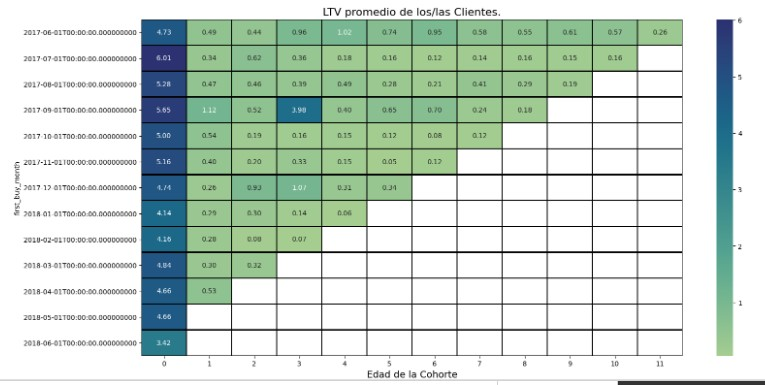

first_buy_month

* 2017-06-01    12.0
* 2017-07-01:     8.0
* 2017-08-01:     8.0
* 2017-09-01:    13.0
* 2017-10-01:     6.0
* 2017-11-01:     6.0
* 2017-12-01:     8.0
* 2018-01-01:     5.0
* 2018-02-01:     5.0
* 2018-03-01:     5.0
* 2018-04-01:     5.0
* 2018-05-01:     5.0
* 2018-06-01:     3.0

Podemos evidenciar nuevamente que los mayores ingresos se generan desde la edad de cohorte 0, esto nos confirma que la moryoria de nuestros clientes compran en su primera visita. los mejores ingresos los tenemos en el cohoter de junio y el cohorte de septiembre luego los demas cohortes se mantienen en un estandar de entre 5 y 8 excepto junio de 2018 que si esta en 3 pero esto pudiera estar generandose devido a que no estan todos los registros de este mes.

## Marketing

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

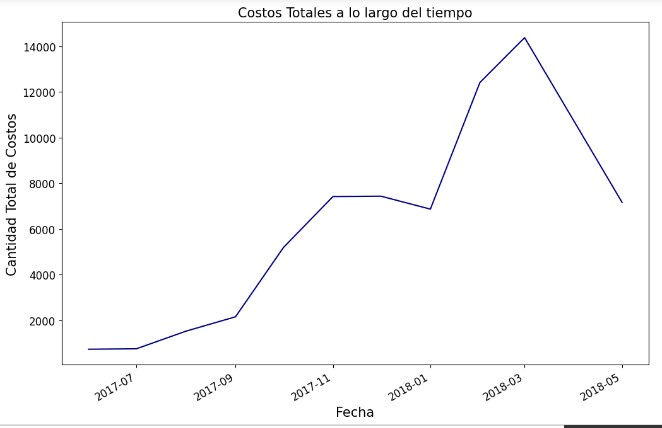

dt

* 2018-03-01:    14372.80
* 2018-02-01:    12408.84
* 2017-12-01:     7435.05
* 2017-11-01:     7418.46
* 2018-05-01:     7164.72
* 2018-01-01:     6868.72
* 2017-10-01:     5186.20
* 2017-09-01:     2155.04
* 2017-08-01:     1526.97
* 2017-07-01:      756.08
* 2017-06-01:      735.26

Los meses con mayores costos fueron Febrero de 2018 con (12409) y Marzo de 2018 con (14373), luego el mes 4 y 5 se redujo a los costos por asi decirlo estandar que se venian veniendo desde meses anteriores los cuales son costos no mayores a 7500.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

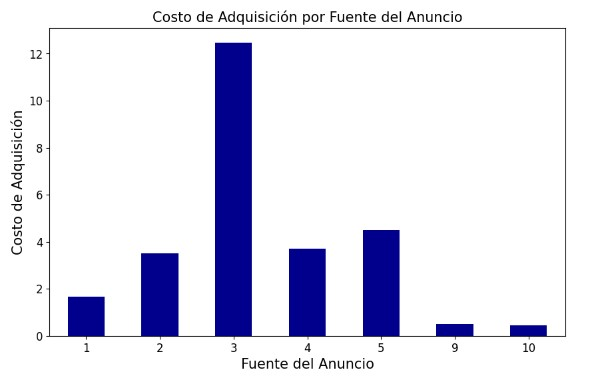

source_id
* 1:      1.669532
* 2:      3.520368
* 3:     12.475347
* 4:      3.716047
* 5:      4.504085
* 9:      0.512617
* 10:     0.435294

Nuestros análisis previos identificaron a las fuentes 3 y 4 como las principales generadoras de clientes, destacando la fuente 4 por su mayor volumen de usuarios. Sin embargo, el nuevo análisis revela que, aunque la fuente 3 también contribuye, su costo por usuario es aproximadamente tres veces superior al de la fuente 4.

En conclusión, la fuente 4 se posiciona como la más efectiva tanto por su rentabilidad como por su capacidad de atracción. Proponemos un análisis más profundo de las estrategias implementadas en la fuente 4 para evaluar su replicabilidad en las demás fuentes. Especialmente, en la fuente 3 se debe priorizar la optimización de su costo de adquisición.

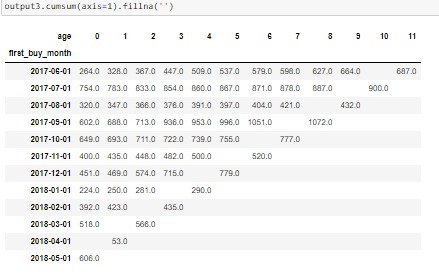

age

* 0:     471.0
* 1:     447.0
* 2:     540.0
* 3:     621.0
* 4:     606.0
* 5:     722.0
* 6:     685.0
* 7:     668.0
* 8:     862.0
* 9:     548.0
* 10:    900.0
* 11:    687.0

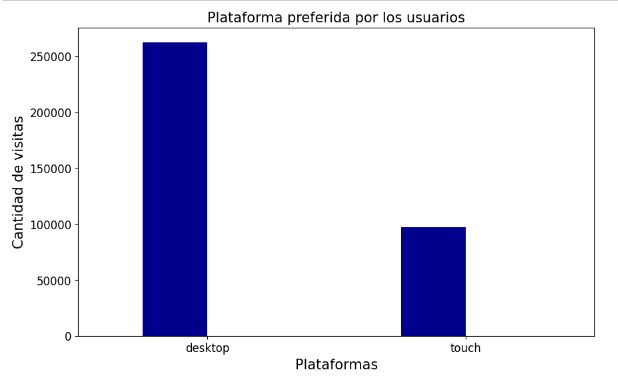

El análisis de las cohortes revela que el costo de adquisición de cada usuario se recupera rápidamente, generando un margen de beneficio promedio entre 400 y 900 mensuales. Este resultado es altamente positivo, dado el bajo costo de adquisición.

Respecto a los dispositivos utilizados, observamos una clara preferencia por las computadoras de escritorio, con un 73% del tráfico total. Los dispositivos móviles representan el 27% restante. Estos datos sugieren que podríamos explorar estrategias de optimización para dispositivos móviles a fin de aumentar su contribución a los ingresos.

# Recomendaciones <a id='recomendaciones'></a>


## Optimización de la Experiencia de Usuario:

    * Dado que la mayoría de las compras ocurren el primer día de visita, enfócarse en mejorar la experiencia de usuario inicial para aumentar las conversiones.
    
    * Considerar implementar estrategias de retención para aumentar el porcentaje de usuarios activos diarios, especialmente a largo plazo.


## Estrategia de Marketing Multicanal:

    * Priorizar la inversión en las fuentes de adquisición 3 y 4, que han demostrado ser las más efectivas en términos de volumen de usuarios.
    
    * Optimizar las estrategias para la fuente 3 para reducir su costo de adquisición de clientes, que actualmente es tres veces superior al de la fuente 4.
    
    * Considerar reducir o eliminar la inversión en la fuente 7, que ha demostrado ser ineficaz.


## Optimización para Dispositivos Móviles:

    * Aunque las computadoras de escritorio dominan con un 73% del tráfico, recomiendo invertir en mejorar la experiencia móvil para capturar una mayor parte del 27% del tráfico móvil.
    
    * Desarrollar estrategias específicas para aumentar las conversiones en dispositivos móviles.


## Segmentación y Personalización:

    * Utilizar los datos de cohortes para personalizar las ofertas y comunicaciones basadas en el comportamiento de compra de los usuarios.
    
    * Implementar estrategias de reactivación para usuarios que no han realizado compras después de su visita inicial.


## Gestión del Ciclo de Vida del Cliente:

    * Desarrollar programas de fidelización para aumentar la frecuencia de compra, ya que el promedio actual es de 1 pedido mensual por usuario.
    
    * Implementar estrategias para aumentar el valor de compra promedio y, por ende, el LTV de los clientes.


## Optimización de Costos de Marketing:

    * Continúar monitoreando y optimizando el ROMI, que actualmente muestra un rendimiento positivo con márgenes de beneficio entre 400 y 900 mensuales por usuario.
    
    * Considerar redistribuir el presupuesto de marketing hacia las fuentes con mejor rendimiento y menor costo de adquisición.


## Análisis Continuo y Toma de Decisiones Basada en Datos:

    * Establecer un sistema de monitoreo continuo de KPIs clave como DAU, WAU, MAU, tasa de conversión, y ROMI.
    
    * Utilizar estos datos para informar decisiones estratégicas y ajustar las tácticas de marketing y desarrollo de producto.



Implementando estas recomendaciones, Y.Afisha puede optimizar su rendimiento, mejorar la experiencia del usuario y maximizar el retorno de sus inversiones en marketing, asegurando un crecimiento sostenible y rentable a largo plazo.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho Cristhoper! De manera general puedo decirte que presentaste un proyecto muy completo, revisaste minusiosamente cada punto de interés para este caso de análisis lo cual demuestra tu capacidad análitica y sobre todo en cómo te apoyas en datos para poder generar las conclusiones acertadas. 
    
Te felicito por como redactaste la parte final dando recomendaciones para los próximos pasos a realizar, parte de un análsis es ayudar a la toma de decisiones basadas en datos.
    
Saludos!
</div>